# Extraktion von Textdaten aus Dokumenten


## Download von HTML-Dateien

Häufig wirst du dich für Content auf Webseiten interessieren. Webseiten nutzen HTML zur Darstellung und in den allermeisten Fällen wird auch HTML übertragen (ab und zu wirst du auch JSON als Übertragungsformat finden).

Die meisten Beispiele im NLP-Kurs nutzen als Content den [Heise Newsticker](https://www.heise.de/newsticker/). Du wirst ihn wahrscheinlich auch als wichtige Informationsquelle kennen. Die Artikel haben einen noch übersichtlichen Umfang und sind inhaltlich interessant.

Im ersten Schritt solltest du deshalb einen Artikel aus dem Newsticker herunterladen. Weil wir uns alle ein gutes Jahr 2021 wünschen, haben wir dafür den Artikel mit den Neujahrswünschen ausgewählt:

In [ ]:
import requests

html_filename = "Guten-Rutsch-und-ein-gesundes-neues-Jahr-2021-5001311.html"
r = requests.get(f"https://www.heise.de/news/{html_filename}")
open(html_filename, 'wb').write(r.content)

Die Datei speicherst du ab, wir werden sie noch häufiger benötigen. Abgesehen davon ist es immer eine gute Idee, die benötigten *Quelldaten* möglichst abzuspeichern.

Im nächsten Schritt liest du den Content der Datei wieder ein:

In [ ]:
html = open(html_filename).read()

## `BeautifulSoup` als HTML-Parser

Du benötigst jetzt eine Möglichkeit, das HTML zu parsen und die Daten daraus zu extrahieren. Dafür gibt es im Python-Ökosystem mehrere Möglichkeiten.

Wir haben uns hier für `BeautifulSoup` entschieden. Das Paket hat ein relativ einfaches API und kann auch mit *defektem HTML* umgehen. Daher auch der Name *Soup*, der darauf hindeuten soll, dass auch eine *Suppe* aus HTML-Tags verarbeitet werden kann.

Im ersten Schritt importierst du das Paket und übergibst den HTML-Content. Als Ergebnis erhältst du ein Objekt, das wir `soup` genannt haben:

In [ ]:
!pip install bs4

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html)

Den Titel des Dokuments kannst du nun ganz einfach ermitteln:

In [ ]:
soup.title

Oft ist es geschickter, die Hauptüberschrift zu nutzen, weil du dann nicht das " | heise online" entfernen musst. Auch das ist ganz leicht:

In [ ]:
soup.h1

Wenn dich nur der Text interessiert, kannst du einfach `.text` anhängen:

In [ ]:
soup.h1.text

Die Steuerzeichen stören normalerweise, diese entfernst du mit der Methode `.strip()`:

In [ ]:
soup.h1.text.strip()

Das sieht jetzt schon richtig gut aus! Das Dokument könnte allerdings mehrere Überschriften haben, daher kannst du `BeautifulSoup` auch anweisen, nur solche mit einem bestimmten *CSS-Selektor* auszuwählen, den du im letzten Schritt mit "Copy CSS selector" kopiert hast:

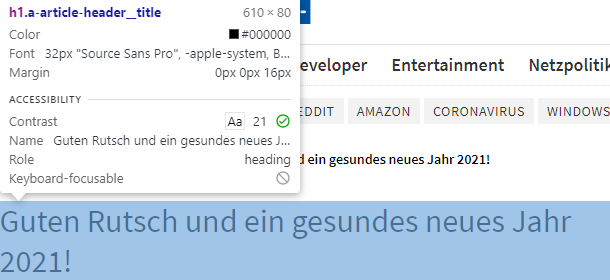

In [ ]:
soup.select("#meldung > div.article-layout__header-container > header > h1")

Wenn du genau weißt, dass es nur einen einzigen Treffer geben wird, kannst du die Methode `select_one` verwenden:

In [ ]:
soup.select_one("#meldung > div.article-layout__header-container > header > h1")

Ähnlich lässt sich auch der Einleitungstext selektieren:

In [ ]:
soup.select_one("#meldung > div.article-layout__header-container > header > p")

Bei den Absätzen der Meldung musst du eine andere Strategie wählen, um alle zu "erwischen":

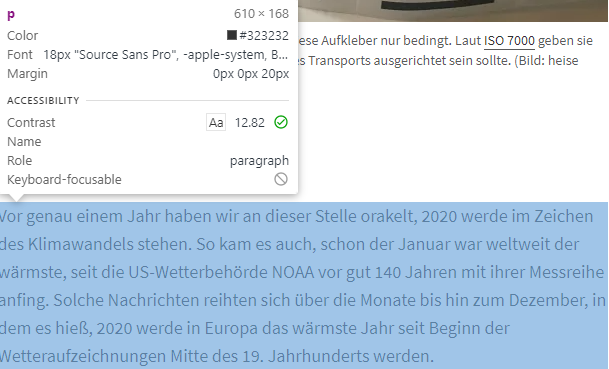

In [ ]:
soup.select("#meldung > div.article-layout__content-container > div > p")

Schließlich kannst du auch noch das Kürzel des Redakteurs ermitteln. Hier funktioniert der CSS-Selektor nicht so gut, dafür verwendet Heise dankenswerterweise fast schon *semantisches HTML*:
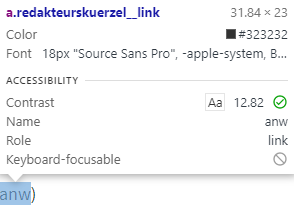

In [ ]:
soup.select_one("a.redakteurskuerzel__link")

## Extraktion semistrukturierter Daten

Wie du im letzten Teil gesehen hast, stehen sehr viele semi-strukturierte Daten in dem `<script type="application/ld+json">`. Das würden wir jetzt gerne auslesen, das ist aber mit mit `BeautifulSoup` nicht ganz so einfach, das es den (gültigen) CSS-Selektor nicht versteht:

In [ ]:
soup.select_one("script[type=application/ld+json]")

Allerdings kannst du dir mit der alternativen Methode `find` behelfen, die zwar nur Tags finden kann, deren Attribute kann man aber spezifizieren:

In [ ]:
soup.find("script", type="application/ld+json")

Nun versuchst du, den Text zu extrahieren und als JSON-String zu interpretieren:

In [ ]:
import json
ld = json.loads(soup.find("script", type="application/ld+json").string)
ld

Das ist sehr praktisch, weil du mit einem einzigen Befehl sehr viele interessante Daten auf einmal erhältst. Das Datum (den *Timestamp*) der Meldung kannst du z.B. ganz einfach ermitteln:

In [ ]:
ld['datePublished']

## BeautifulSoup kann noch mehr

Wie immer auch hier der Hinweis für dich, dass `BeautifulSoup` noch deutlich mehr kann als die Features, die du hier gesehen hast. Ganz nützlich ist z.B. die `prettify`-Methode, mit der sich HTML "schön" ausgeben lässt.

Sicherlich kann man zu den Fähigkeiten ganze Bücher füllen. Für die allermeisten Anforderungen werden dir allerdings die oben vorgestellten Methoden genügen, um aus HTML-Dokumenten (semi-) strukturierte Daten zu erzeugen.